
An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this what we have to do 

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.



In [3]:
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))
  

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [6]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df.head()
#plt.figure()
# plot the linear data and the exponential data
#plt.plot(TMAX, '-o', TMIN, '-o')

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [7]:
import datetime
df['Data_Value']=df['Data_Value']*0.1
#df['Year']=df['Date']
df['year'] = pd.DatetimeIndex(df['Date']).year
df['day_month']=df['Date'].apply(lambda x: x[5:])
#df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
#df['Date_Month']=df['Date'].iloc[-5:]
df=df.drop(df['day_month'] != '02-29')
df_14=df[~(df['year']==2015)]
df_15=df[df['year'] == 2015]


In [18]:
#df_15=df[df['Date'] == 2014-11-12]
df[df['day_month']=='05-26'].min()

ID            USC00200032
Date           2005-05-26
Element              TMAX
Data_Value             -1
year                 2005
day_month           05-26
dtype: object

In [11]:
import numpy as np
max_0415 = df_14.groupby('day_month').agg({'Data_Value':np.max})
min_0415 = df_14.groupby('day_month').agg({'Data_Value':np.min})
max_15 = df_15.groupby('day_month').agg({'Data_Value':np.max})
min_15 = df_15.groupby('day_month').agg({'Data_Value':np.min})
all_max = pd.merge(max_0415.reset_index(), max_15.reset_index(), left_index=True, on = 'day_month')
all_min = pd.merge(min_0415.reset_index(), min_15.reset_index(), left_index=True, on = 'day_month')

In [21]:
break_max = all_max[all_max['Data_Value_y'] > all_max['Data_Value_x']]
break_min = all_min[all_min['Data_Value_y'] < all_min['Data_Value_x']]


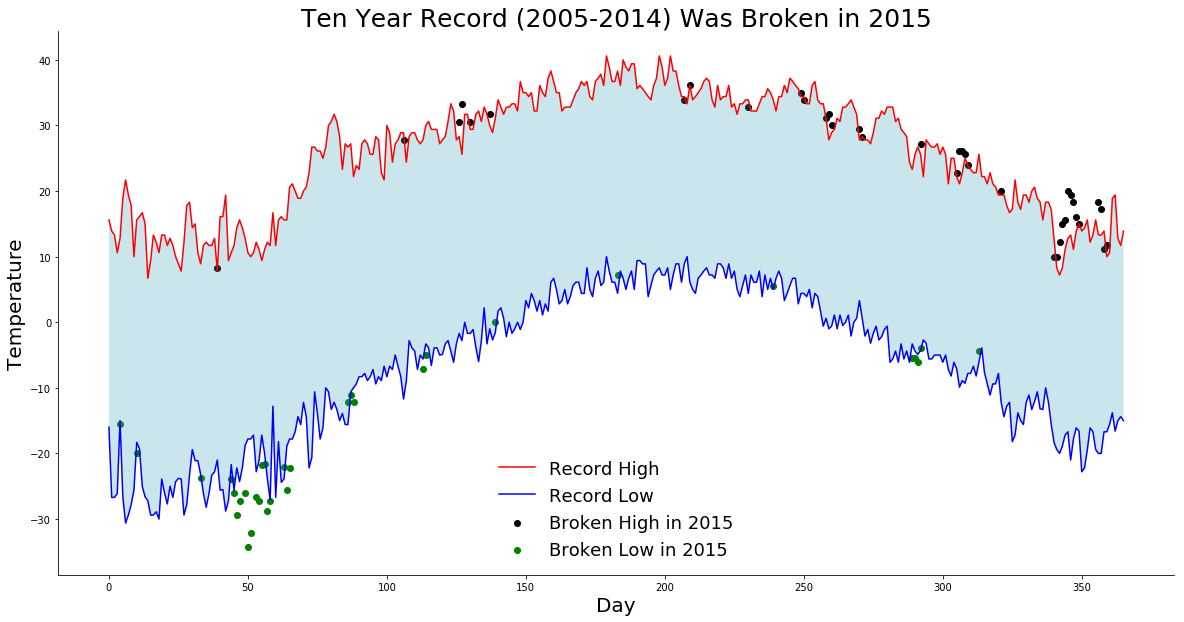

In [24]:
%matplotlib inline
plt.figure(figsize=(20,10))

plt.plot(max_0415.values, c = 'red', label ='Record High')
plt.plot(min_0415.values, c = 'blue', label ='Record Low')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Ten Year Record (2005-2014) Was Broken in 2015', fontsize=25)

plt.scatter(break_max.index.tolist(), break_max['Data_Value_y'].values, c = 'black', label = "Broken High in 2015")
plt.scatter(break_min.index.tolist(), break_min['Data_Value_y'].values, c = 'green', label = "Broken Low in 2015")

plt.gca().fill_between(range(len(max_0415)), 
                       np.array(max_0415.values.reshape(len(min_0415.values),)), 
                       np.array(min_0415.values.reshape(len(min_0415.values),)), 
                       facecolor='#2F99B4', 
                       alpha=0.25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=18, frameon = False)
plt.show()